# KNN classifier for predicting day of week

In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

## load modified data from csv

see nick-explanatory.ipynb for csv creation

In [2]:
features = pd.read_csv('nick_df_features.csv',index_col=0)

In [3]:
features.sample(5)

,Date,Weekday,BlockDensity,OtherPuzAns,AnswerLength,WeekdayNum
5756,2010-01-13,Wednesday,16.000000,4406,4.973684,2
3679,2004-02-27,Friday,12.000000,3206,5.500000,4
1009,1996-10-30,Wednesday,15.111111,5505,5.026316,2
7410,2014-07-25,Friday,12.888889,3738,5.600000,4
3358,2003-04-12,Saturday,15.555556,2666,5.937500,5


Feature description:
- **BlockDensity**: percentage of the puzzle that is black blocks
- **OtherPuzAns**: the number of other puzzles that contain clues from this puzzle
- **AnswerLength**: the average answer length for the puzzle
- **WeekdayNum**: weekday as number (Monday = 0), in case the model needs digits?

## plot our features

Maybe I'll try the fancy rotating plot later

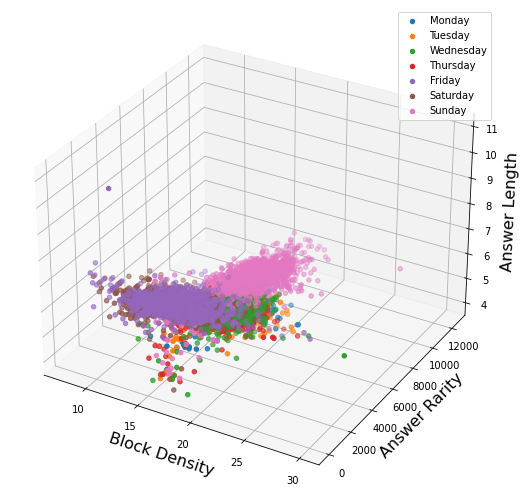

In [4]:
fig, ax = plt.subplots(figsize = (12,9))

ax = plt.axes(projection ="3d")
for i in range(7):
    ax.scatter3D(features['BlockDensity'].loc[features['WeekdayNum'] == i],
                  features['OtherPuzAns'].loc[features['WeekdayNum'] == i],
                  features['AnswerLength'].loc[features['WeekdayNum'] == i],
                  label=features['Weekday'].loc[features['WeekdayNum'] == i].iloc[0])

ax.set_xlabel("Block Density", fontsize = 16)
ax.set_ylabel("Answer Rarity", fontsize = 16)
ax.set_zlabel("Answer Length", fontsize = 16)
plt.legend()
plt.show()

## convert features to numpy arrays

In [5]:
X = features[['BlockDensity','OtherPuzAns','AnswerLength']].to_numpy()
y = features[['WeekdayNum']].to_numpy()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 617, 
                                                    shuffle=True,
                                                    stratify=y)

## get accuracy on training set

Matt did it 🤷‍♀️

In [7]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [8]:
knn.fit(X_train,y_train.ravel())

KNeighborsClassifier(n_neighbors=3)

In [9]:
y_predict = knn.predict(X_train)

In [10]:
print("Our model has a",
      np.round(sum(y_predict == y_train.ravel())/len(y_train.ravel())*100,2),
      "% accuracy on the training set")

Our model has a 61.23 % accuracy on the training set


## cross validation

In [11]:
kfold = StratifiedKFold(5,shuffle = True,random_state = 440)

In [12]:
def get_acc(model,X,y):
    pred = model.predict(X)
    return np.sum(pred == y)/len(y)

In [13]:
max_neighbors = 200

accs = np.zeros((5,max_neighbors))

j = 0

for train_index, test_index in kfold.split(X_train,y_train):
    X_train_train, X_train_test = X_train[train_index], X_train[test_index]
    y_train_train, y_train_test = y_train[train_index], y_train[test_index]
    for i in range(1, max_neighbors+1):
        knn = KNeighborsClassifier(i)
        
        knn.fit(X_train_train, y_train_train.ravel())
        
        accs[j, i-1] = get_acc(knn,X_train_test,y_train_test.ravel())
        
    j+=1

## plot CV accuracy

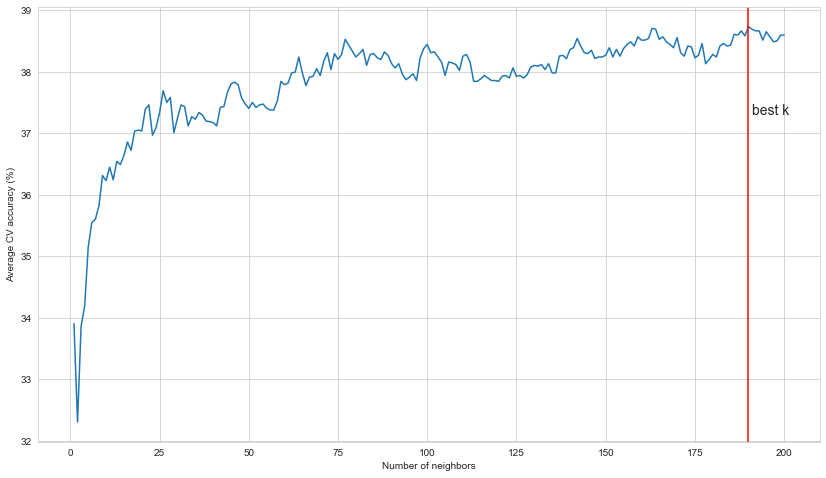

In [14]:
best_k = np.argmax(np.mean(accs, axis=0))+1
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(14,8))

ax.plot(range(1,max_neighbors+1),100*np.mean(accs,axis=0))
ax.axvline(x=best_k, color='r')
ax.annotate("best k",(best_k+1,37.3), fontsize=14)
ax.set_xlabel("Number of neighbors")
ax.set_ylabel("Average CV accuracy (%)")

plt.show()

In [15]:
print(f"The highest accuraccy is in the model with {best_k} neighbors.")

The highest accuraccy is in the model with 190 neighbors.


In [16]:
knn = KNeighborsClassifier(n_neighbors = 77)

knn.fit(X_train,y_train.ravel())
best_k_acc = np.round(get_acc(knn,X_test,y_test.ravel())*100,2)

print(f"The model with {best_k} neighbors has a {best_k_acc}% accuracy on the test set.")

The model with 190 neighbors has a 38.44% accuracy on the test set.


It's still not very good. 😢

But it's better than 14%, which is guessing days at chance?